>Below is a copied and translated version of seaborn tutorial (v0.12.2) from the seaborn official docs.
>
>해당 내용은 seaborn 공식 문서에서 제공하는 seaborn 튜토리얼(v0.12.2)의 단순 필사 및 번역본입니다.  
>     
> © Copyright 2012-2022, Michael Waskom. (https://seaborn.pydata.org/tutorial.html#)

# 데이터의 분포 시각화
Visualizing distributions of data

데이터를 분석하거나 모델링하려면 먼저 변수가 어떻게 분포되어있는지 알아야합니다. 
데이터의 분포를 시각화하는 것만으로도 많은 중요한 의문점들이 해결될 수 있습니다 :  
관찰범위(range of distribution), 주요 경향(centural tendancy), 한 쪽으로 치우쳐져 있는지(왜도; heavily skewed)?, 다봉분포(bimodality)인지?, 이상치(outlier)가 있는지?, 혹은 이런 질문들의 답이 변수의 하위집단에 따라 달라지는지?  
<br>
[분포모듈(distribution module)](https://seaborn.pydata.org/api.html#distribution-api)은 이런 질문들에 대한 답을 줄 수 있게 디자인되어 있습니다. 
axes-level function (`histplot()`, `kdeplot()`, `ecdfplot()`, `rugplot()`)이 figure-level function (`displot()`, `jointplot()`, `pariplot()`)과 함께 그룹화됩니다.  
<br>
분포를 시각화하는 데에는 여러 방법이 있고, 각 방법마다 장단점이 있습니다. 
이 특성과 요소를 이해해서 목적에 가장 적합한 접근방식을 선택하는 것이 중요합니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

## 1. 단일변수 히스토그램 플롯
Plotting univariate histograms

분포를 시각화하는 가장 일반적인 방식은 아마 히스토그램(histogram)일 것입니다. 

히스토그램(histogram)은 분포를 시각화하는 가장 일반적인 방법입니다. 그리고 `displot()`에서는 `histplot()`과 같은 코드를 사용하여 기본 접근 방식으로 histogram을 그립니다. 
histogram은 bar plot과 같이 생겼습니다. 차이점은 여기서는 변수를 나타내는 축이 불연속 구간(bins)으로 나뉘고, 해당 구간의 관측 횟수(observation count)가 bar의 높이가 된다는 것입니다.

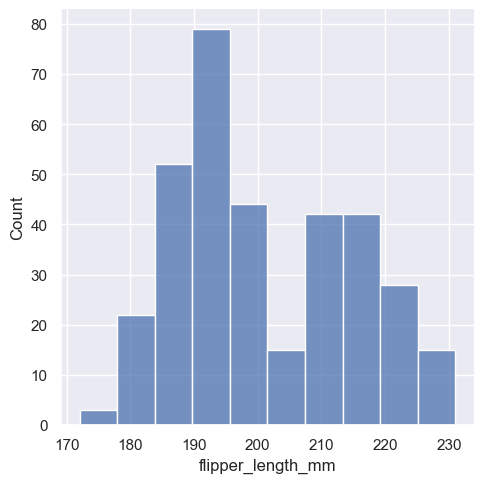

In [2]:
penguins = sns.load_dataset('penguins')
sns.displot(penguins, x='flipper_length_mm');

이 플롯은 `flipper_length_mm` 변수에 대한 몇가지 인사이트를 바로 제공합니다. 예를 들어, 가장 흔한 flipper 길이가 195mm 정도이고, 분포가 bimodal(봉이 2개인 것)로 나타나는 것으로 보아, 이 195mm 라는 수치가 전체 데이터를 대표한다고 말하기는 어렵습니다.

### 구간분할 사이즈 선택
Choosing the bin size

bin의 크기는 중요한 parameter 입니다. bin의 크기를 잘못 설정하면 데이터의 중요한 특징(feature)가 가려지거나, 임의의 변동성으로 인한 경향성(apparent feature)이 생겨서 오해의 소지가 생길 수 있습니다. 
displot() 과 histplot()은 default로 데이터의 분산(variance)과 관측횟수를 기준으로 bin size를 결정합니다. 
하지만 이런 기본설정은 특정 가정에 기반한 것이기 때문에 너무 의존해서는 안됩니다. 
항상 다양한 bin size로 분포를 보며 일관성이 있는지 확인해야합니다. 
bin size를 직접 설정하려면 `binwidth` parameter를 사용하세요 :

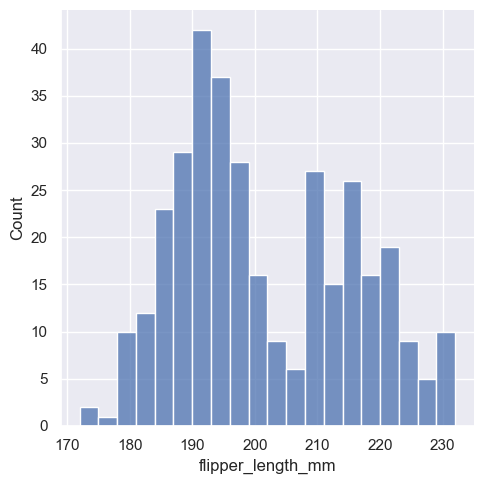

In [3]:
sns.displot(penguins, x='flipper_length_mm', binwidth=3);

상황에 따라서, 'bin size'보다는 'bin의 개수'를 지정하는게 더 직관적일 수 있습니다.

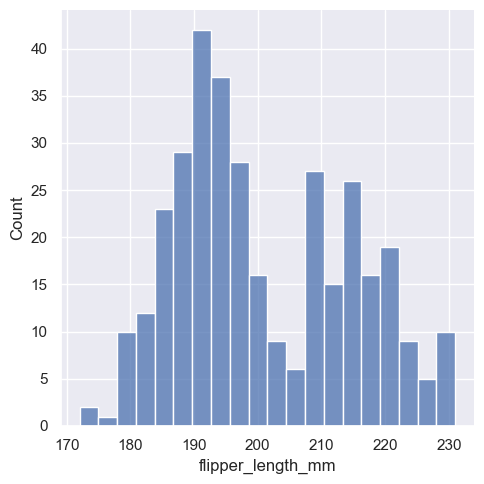

In [4]:
sns.displot(penguins, x='flipper_length_mm', bins=20);

위에서 언급한 기본설정(default)이 잘 작동하지 않는 예로는, 변수가 상대적으로 적은 수의 정수 값을 사용하는 경우가 있습니다. 이러면 bin width가 너무 작아져서 분포에 빈 공간(awkward gaps)이 생깁니다.

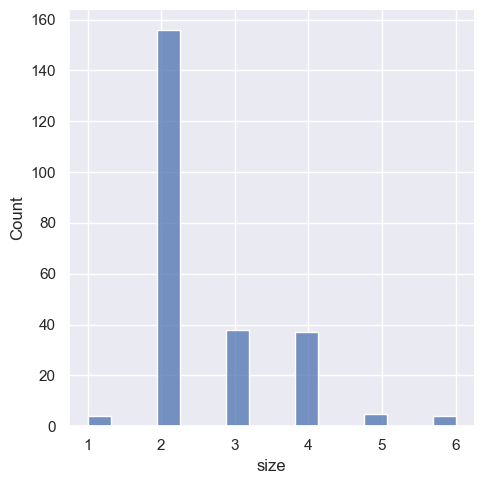

In [5]:
tips = sns.load_dataset('tips')
sns.displot(tips, x='size');

이럴 경우 `bins`에 배열(array)를 전달해서 정확하게 분할되는 구간(bin breaks)을 지정하여 해결할 수 있습니다.

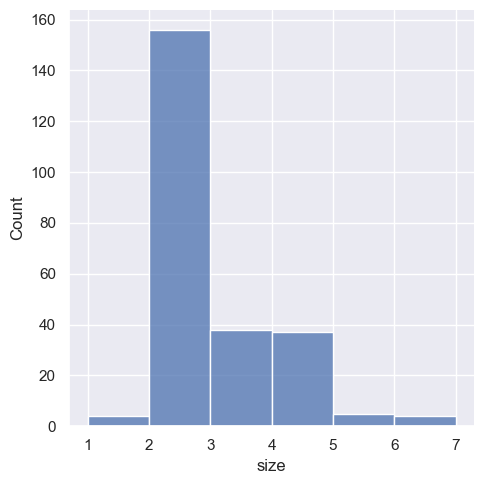

In [6]:
sns.displot(tips, x='size', bins=[1, 2, 3, 4, 5, 6, 7]);

혹은 `discrete=True`로 설정해서 해결할 수도 있습니다. 이러면 데이터셋에서 고유 값(unique value)들을 찾아서 구간을 분할하고, bar를 각 value의 중심에 위치시킵니다.

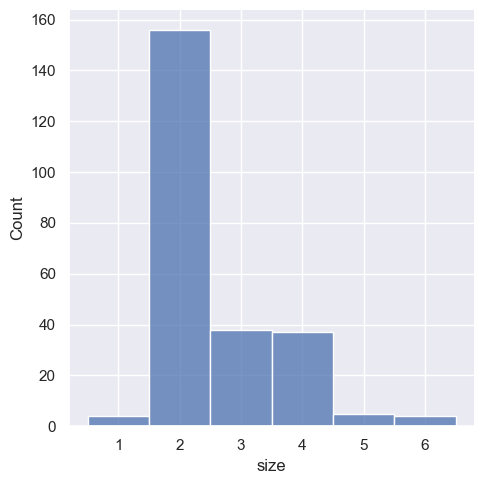

In [7]:
sns.displot(tips, x='size', discrete=True);

histogram의 로직으로 범주형(categorical) 변수의 분포를 시각화할 수도 있습니다. 
범주형 변수의 경우 discrete bins(불연속형 구간)이 자동 설정되지만, 범주형이라는 것을 강조하기 위해서 약간 '폭을 축소(shrink)'하는 것을 추천합니다.

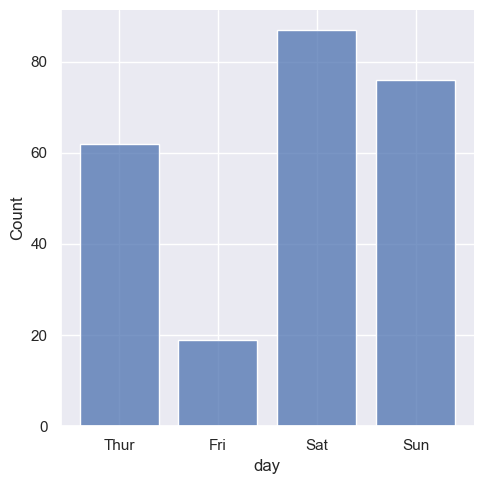

In [8]:
sns.displot(tips, x='day', shrink=.8);

### 다른 변수에 대한 조건
Conditioning on other variables

어떤 변수의 분포에 대해 이해했다면, 다음으로는 그 분포가 다른 변수들에 따라서는 어떻게 달라지는지를 봐야 합니다. 
예를 들어, 위에서 봤던 flipper length 분포의 bimodal(봉이 2개인 것)을 설명할 수 있는게 있을까요? 
`displot()`과 `histplot()`에서는 `hue` semantic 으로 조건에 따라 데이터를 나누어 볼 수 있습니다. 
`hue`에 변수를 할당하면 그 변수의 고유 값(unique value)에 따라 다른 색상을 가진 별도의 histogram 으로 그려집니다 :

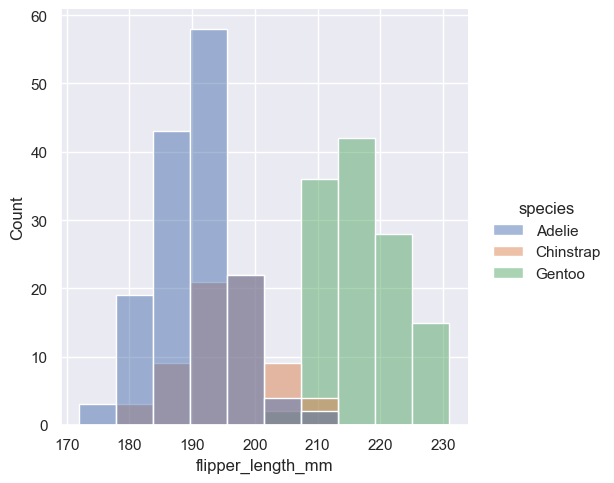

In [9]:
sns.displot(penguins, x='flipper_length_mm', hue='species');

혹은, 각각의 bar를 따로 그리지(layering) 않고, 쌓아올릴(stacked; moved vertically) 수도 있습니다. 이럴 경우, plot의 외곽선이 변수를 하나만 사용했을 때의 것과 일치하게 됩니다. :

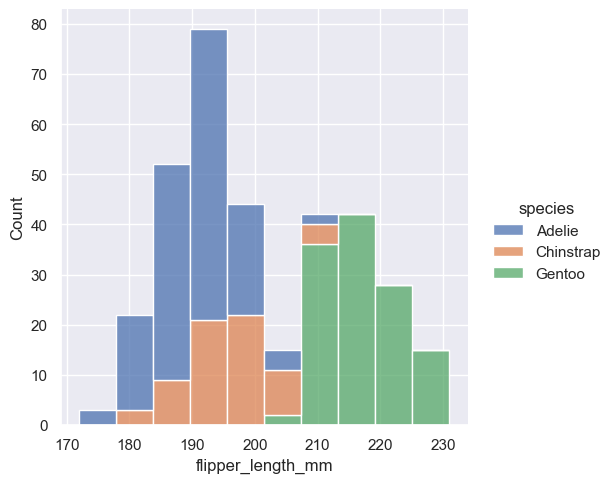

In [10]:
sns.displot(penguins, x='flipper_length_mm', hue='species', multiple='stack');

stacked histogram 은 변수간의 부분-전체 관계를 강조하여 보여주지만, 다른 특성(feature)들을 가려버릴 수 있습니다. 예를 들어, 분포에서 최빈값(mode)를 찾기가 어려워집니다.  
  
다른 방법으로는 변수에 따라 분리된 bar를 수평(horizontally)으로 옮기고 폭을 줄이는 'dodge'가 있습니다. 이러면 bar끼리 겹쳐지지 않아서 높이로 비교하기 쉽습니다. 하지만 범주형 분수가 작은 수의 level만을 가지고 있을 때만 잘 작동합니다 :

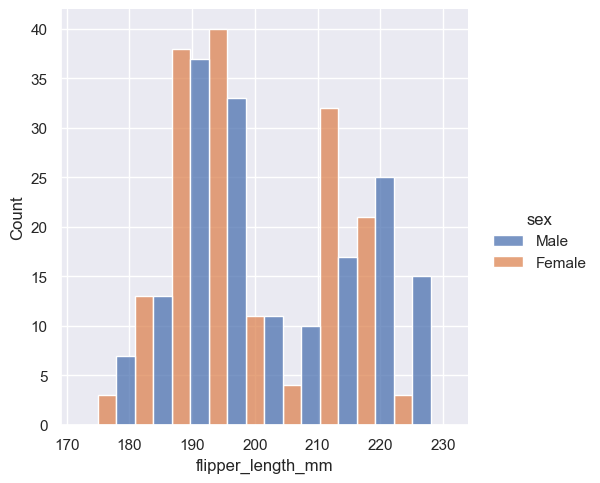

In [11]:
sns.displot(penguins, x='flipper_length_mm', hue='sex', multiple='dodge');

`displot()`은 `FacetGrid`에 그려지는 figure-level function입니다. 그렇기 때문에 `hue`가 아닌 `col`이나 `row`에 두번째 변수를 할당(assign)해서 각각의 분리된 분포를 subplot으로 그릴 수도 있습니다. 이러면 각각의 부분(subset) 분포는 잘 나타내지만, 부분분포끼리 비교하기는 어려워집니다 :

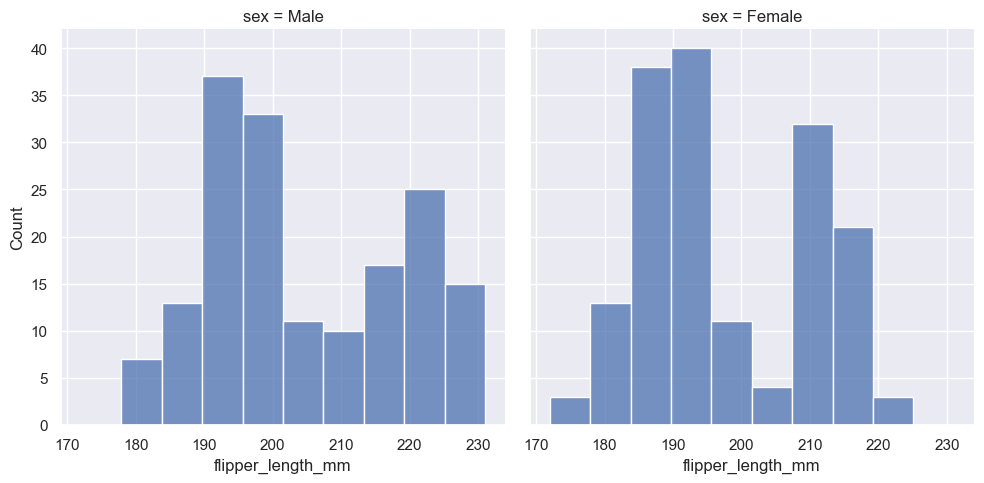

In [12]:
sns.displot(penguins, x='flipper_length_mm', col='sex');

위에서 알아본 방법들(hue semantic, multiple=stack/dodge, col/row semantic)모두 완벽하지는 않습니다. 뒤에서는 histogram 보다 '비교'에 더 적절한 방법들을 살펴보겠습니다.

### 정규화된 히스토그램 통계
Normalized histogram statistics

하위집단(subset)의 크기가 다른 경우 분포를 개수(count)로 표현해서는 잘 비교하지 못할 수 있습니다. 이럴 경우 `stat` parameter를 사용해서 count를 정규화(normalize)하는 방법이 있습니다.

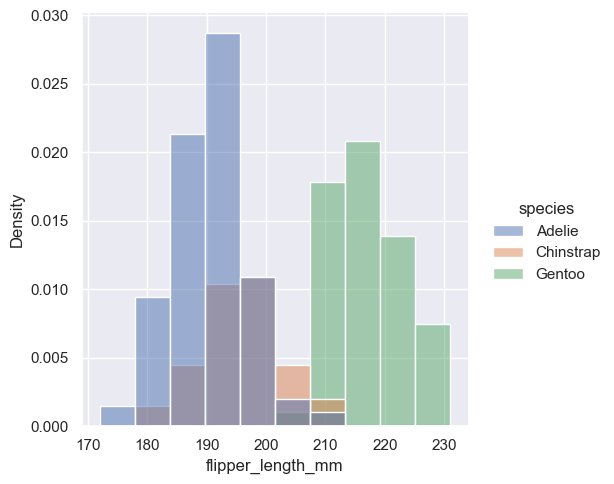

In [13]:
sns.displot(penguins, x='flipper_length_mm', hue='species', stat='density');

이 기능은 default로 전체 분포에 정규화를 적용시키기 때문에 bar의 높이가 재조정(rescale)되기만 합니다. 각 하위집합을 독립적으로 정규화시키려면 `common_norm=False`로 설정해주면 됩니다.

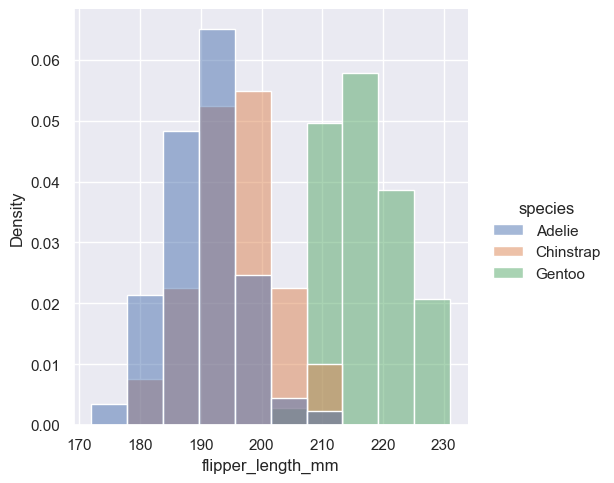

In [14]:
sns.displot(penguins, x='flipper_length_mm', hue='species', 
            stat='density', common_norm=False);

밀도 정규화(densirt normalization)는 막대의 크기를 조정하여 영역의 합이 1이 되도록 합니다. 즉, 밀도의 축을 집접 해석할 수는 없습니다.  
또 다른 옵션은 막대의 높이가 1이 되도록 정규화하는 것입니다. 이 옵션은 모든 히스토그램에 사용가능하지만, 변수가 불연속일 때 가장 적합합니다.

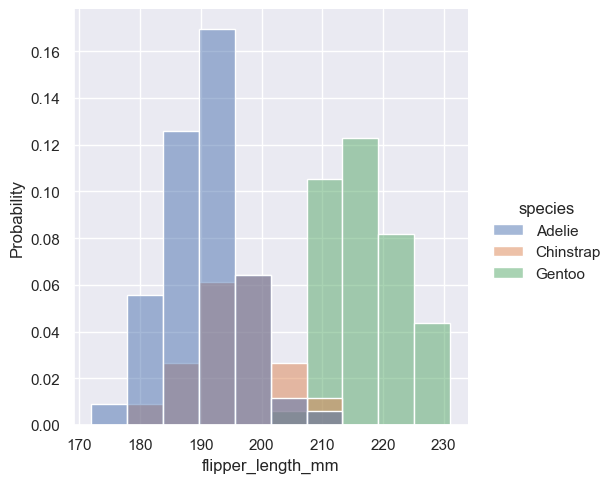

In [15]:
sns.displot(penguins, x='flipper_length_mm', hue='species', stat='probability');

## 커널 밀도 추정
Kernel density estimation

히스토그램의 목적은 관측값을 구간화(bin)하고 계산(count)해서 데이터의 확률밀도 함수(probability density function)를 추정(approximate)하는 것입니다.  
  
커널 밀도 추정(KDE)도 목적은 같습니다. 하지만 여기서는 구간를 분할하는 대신, 가우스 커널(Gaussian kernel)로 관측값을 부드럽게(smooth) plot하여 연속적인 밀도를 추정합니다.

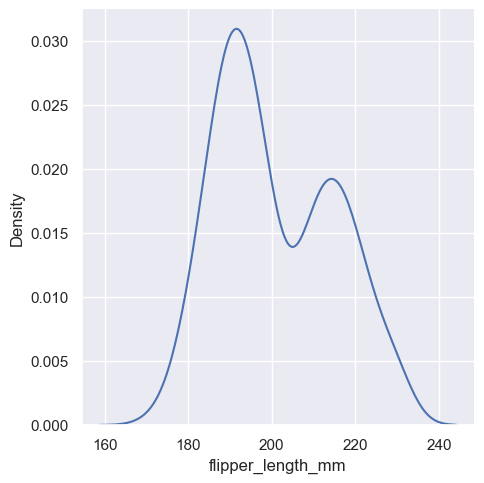

In [16]:
sns.displot(penguins, x='flipper_length_mm', kind='kde');

### 스무딩 폭 선택하기
Choosing the smoothing bandwidth

histogram에서 bin size처럼, KDE에서는 데이터를 정확하게 표현하려면 적절한 smoothing 대역폭(bandwidth)을 선택해야 합니다. 
지나치게 부드러운 추정치(over-smoothed estimate)는 의미 있는 데이터도 지워버릴 수 있고, 반대의 경우(under-smoothed estimate)는 랜덤한 noise가 생겨서 실제 분포모양이 보이지 않게 됩니다.  
추정치의 견고성(robustness)을 확인하는 가장 쉬운 방법은 기본 대역폭(default bandwidth)을 조정하는 것입니다 :

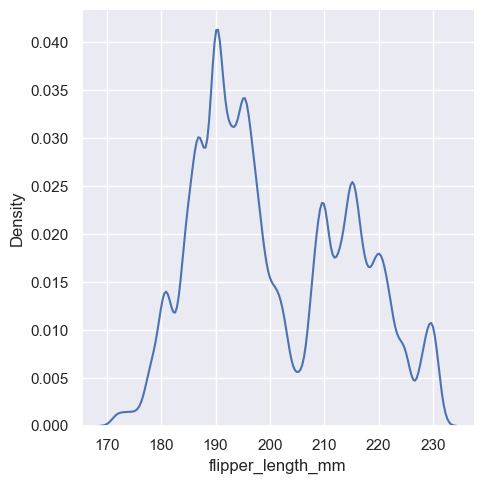

In [17]:
sns.displot(penguins, x='flipper_length_mm', kind='kde', bw_adjust=.25);

대역폭(bandwidth)을 좁히니까 곡선이 덜 매끄러워졌고, 2개의 봉(bimodality)이 더 잘 보입니다. 
반대로, 대역폭을 크게할 수록 bimodality가 완전히 가려집니다 :

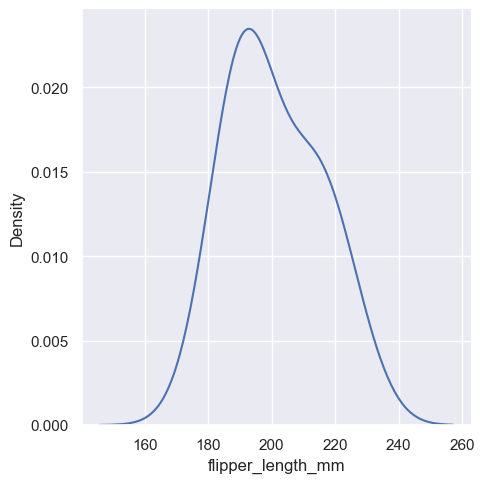

In [18]:
sns.displot(penguins, x='flipper_length_mm', kind='kde', bw_adjust=2);

### 다른 변수에 대한 조건
Conditioning on other variables

히스토그램과 마찬가지로 `hue`에 변수를 할당하면 해당 변수의 level에 따라 각각의 밀도 추정치가 계산됩니다.

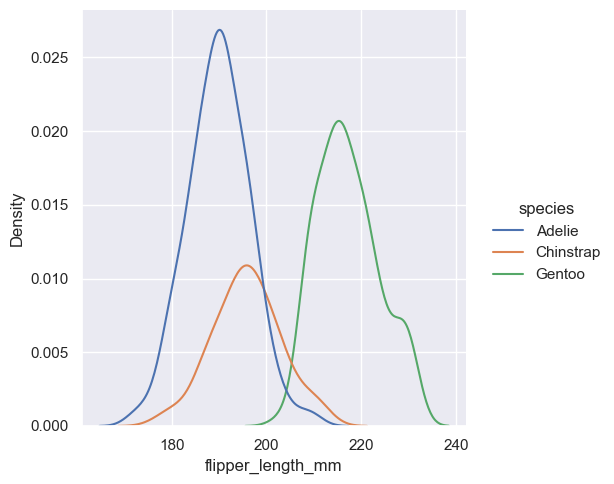

In [19]:
sns.displot(penguins, x='flipper_length_mm', hue='species', kind='kde');

보통 계층형(layered)의 경우 KDE가 히스토그램 보다 해석하기가 쉬워서 비교 작업에 더 많이 사용됩니다.  
위에서 살펴본 다중 분포를 표현하는 방법들은 KDE에도 그대로 적용됩니다 : 

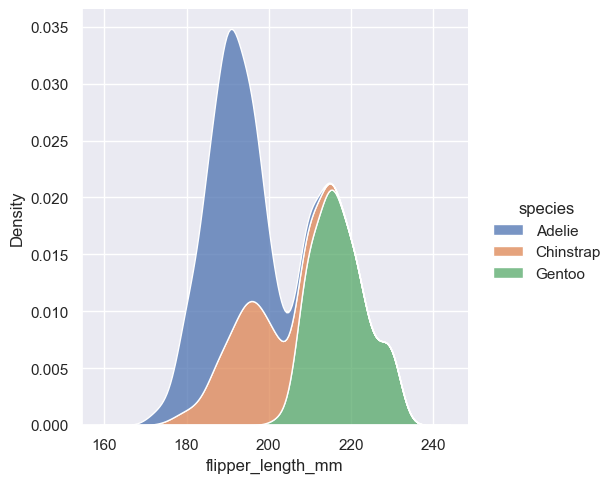

In [20]:
sns.displot(penguins, x='flipper_length_mm', hue='species', kind='kde',
           multiple='stack');

stacked plot을 그리니까 각 커브마다 자동으로 색이 채워(fill)졌습니다.  
single, layered 밀도 커브에서도 기본 투명도(default alpha; opacity)가 다르긴 하지만 fill을 사용하여 색을 채울 수 있습니다.

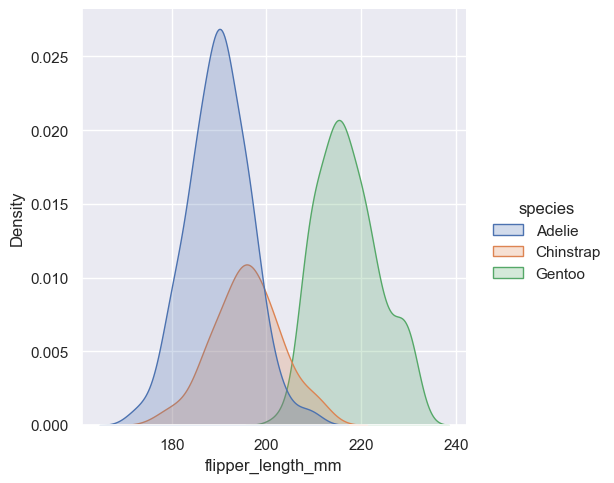

In [21]:
sns.displot(penguins, x='flipper_length_mm', hue='species', kind='kde', fill=True);

### 
Kernel density estimation pitfalls

KDE plot은 장점이 많습니다. 중심경향성(central tendancy), 이원성(bimodality), 왜도(skew) 같이 데이터의 주요 특징을 쉽게 파악하고 하위집단(subset)간에 비교도 할 수 있습니다.  
  
하지만 KDE의 기본 가정 때문에 데이터를 제대로 표현하지 못하는 경우도 있습니다. KDE의 로직은 데이터의 기본 분포가 매끄럽고 경계가 없다고 가정합니다. 이런 가정은 변수가 자연적으로 한정된(bounded) 양을 반영할 때 실패합니다. 경계에 관측값이 가까워지면 (ex. 음수가 될 수 없는 작은 값), KDE 곡선은 비현실적인 값으로 확장하여 추정합니다.

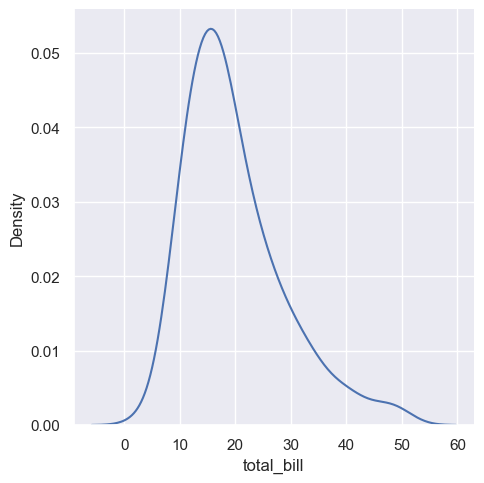

In [22]:
sns.displot(tips, x='total_bill', kind='kde');

이 문제는 부분적으로 해결이 ㅁ가능합니다. 
`cut` parameter를 사용하면 curve가 datapoint의 끝을 넘어 어디까지 그려져야 하는지 지정할 수 있습니다. 
그러나 이 `cut`은 곡선이 그림에만 영향을 미칩니다. 밀도 추정치는 여전히 데이터가 없는 범위까지 smooth되어서 분포의 극단(etreme)에서는 분포가 인위적으로 낮아집니다 :

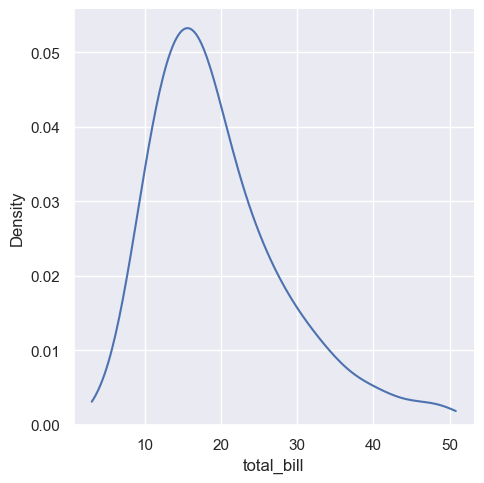

In [23]:
sns.displot(tips, x="total_bill", kind="kde", cut=0);

KDE가 실패하는 경우는 또 있습니다. 
불연속형 데이터에서, 혹은 연속형 데이터이지만 특정 값이 과도하게 표현된 경우 잘 적용되지 않습니다. 
KDE는 데이터의 분포가 곡선이 아니더라도 강제로 부드러운 곡선으로 만들어 보여준다는 것을 꼭 기억하세요.
diamond weight 분포의 예입니다 :

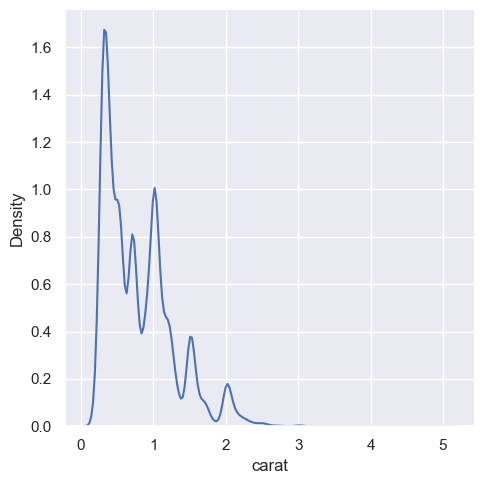

In [24]:
diamonds = sns.load_dataset('diamonds')
sns.displot(diamonds, x='carat', kind='kde');

KDE 를 보면 특정 값을 중심으로 하는 peak이 있는 것 같지만, 히스토그램은 더 들쭉날쭉한 분포를 보여줍니다.

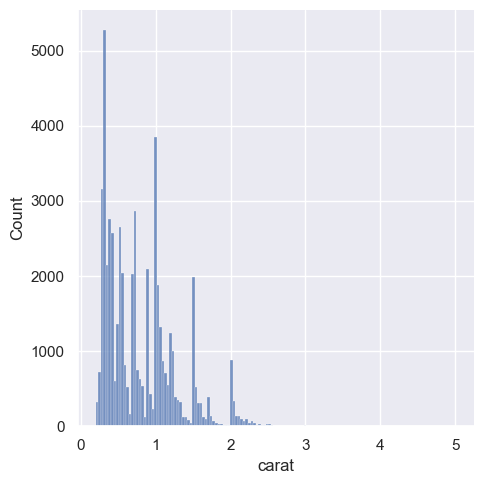

In [25]:
sns.displot(diamonds, x='carat');

As a compromise, it is possible to combine these two approaches. While in histogram mode, displot() (as with histplot()) has the option of including the smoothed KDE curve (note kde=True, not kind="kde"):

절충안으로는 위의 두 접근방식을 결합하는 방법이 있습니다. histogram 모드에서는, `displot()` (`histplot()` 포함) 옵션으로 smoothed KDE curve를 표현할 수 있습니다 : `kde=True` (`kind="kde"`와 다름)

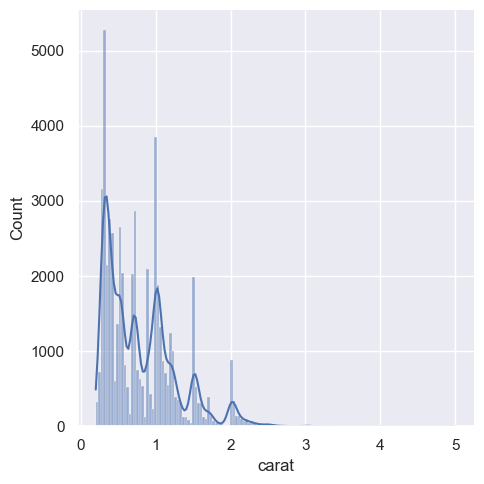

In [26]:
sns.displot(diamonds, x='carat',kde=True);

## 겸험적 누적 분포
Empirical cumulative distributions

분포를 시각화하는 3번째 옵션은 "경험적 누적 분포 함수(emprical cumulative distribution function"를 계산합니다. 
이 plot은 각 관측치(datapoint)을 반영하여 단조증가(monotonically-increasing) 곡선을 그려냅니다. curve에서의 높이는 누적확률로, 해당 포인트의 관측값 이하의 값이 관측될 확률을 의미합니다 :

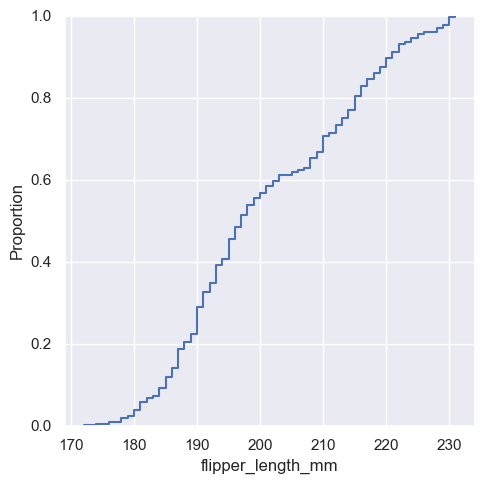

In [27]:
sns.displot(penguins, x='flipper_length_mm', kind='ecdf');

ECDF plot은 2가지 장점이 있습니다. histogram이나 KDE와 달리, 각 관측치(datapoint)를 직접 나타냅니다. 즉, 구간분할(bin size)이나 평탄화(smoothing) 같은 parameter를 신경쓰지 않아도 됩니다. 또한 단조증가 형태이기 때문에 여러 level의 분포를 한번에 비교하기 좋습니다 :

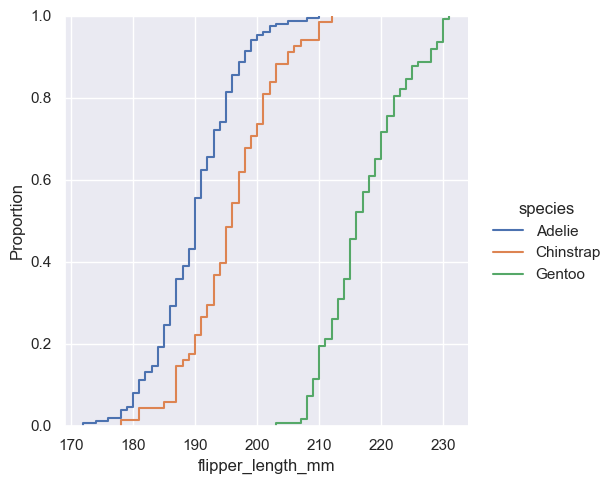

In [28]:
sns.displot(penguins, x='flipper_length_mm', hue='species', kind='ecdf');

EDCF plot의 단점은 전체 분포 형태(distribution shape)를 histogram이나 density curve에 비해 직관적으로 표현하기 어렵다는 것입니다. 위에서 histogram에서는 flipper lengths의 bimodality이 잘 드러났는데 반해, ECDF plot에서는 데이터포인트마다의 기울기를 비교해야만 알 수 있습니다. 이런 단점에도 불구하고 ECDF는 분포에 대한 중요한 정보를 다 담고 있기 때문에 매우 유용한(powerful) 방법입니다.  
<br>

## 이변량 분포 시각화
Visualizing bivariate distributions



지금까지 우리가 다룬 예제들은 단변량(univariate; 종속변수가 1개) 분포였습니다. 즉, `hue`에 변수를 추가하지 않는 한, 1개의 변수에 대한 분포만을 봤습니다.  
만약 여기서 `y`에 2번째 변수를 추가하면 이변량(bivrate) 분포가 됩니다 :

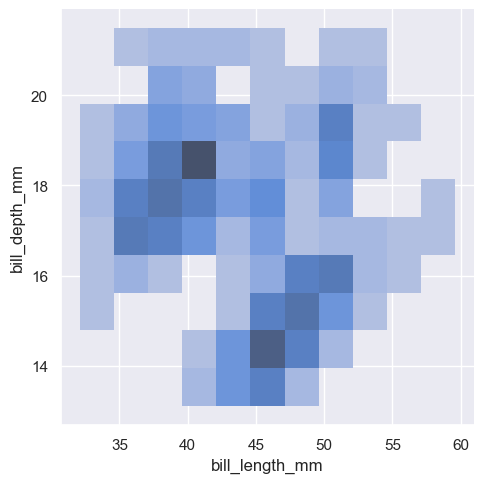

In [29]:
sns.displot(penguins, x='bill_length_mm', y='bill_depth_mm');

이변량 히스토그램(bivariate histogram)은 데이터를 사각형으로 구간화하고, 각 사각형 범위 안의 관측 개수를 타일에 채우기 색상으로 `heatmap()`과 비슷하게 표현합니다.  
비슷하게, 이변량 KDE(bivariate KDE)는 2D 가우시안(Gaussian)으로 (x, y) 관측치를 평활화(smooth)합니다. 결과적으로는 2D 밀도의 윤곽선(countours)이 표현됩니다 : 

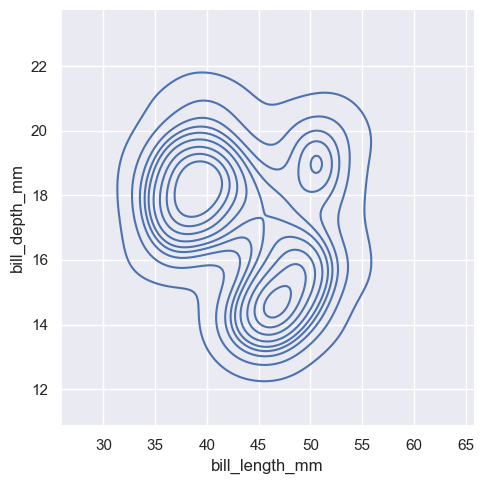

In [30]:
sns.displot(penguins, x='bill_length_mm', y='bill_depth_mm', kind='kde');

`hue` 변수를 사용하면 여러 색상을 사용하여 heatmap이나 contour 집합(sets)을 plot할 수 있습니다. bivariate histogram의 경우, 해당 조건으로 분리된 분포들이 서로 겹치는 부분이 적을 때만 잘 작동합니다 :

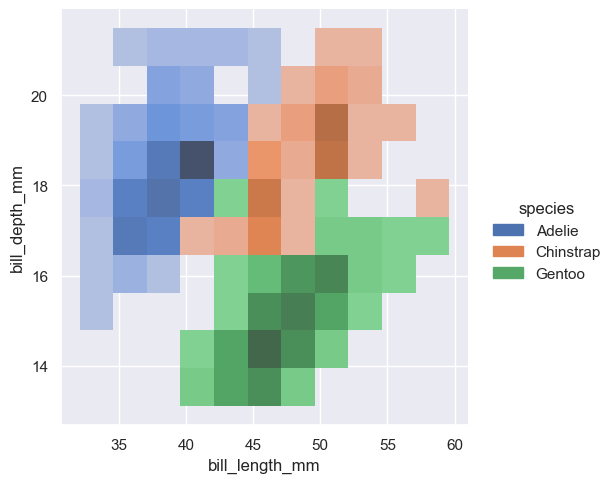

In [31]:
sns.displot(penguins, x='bill_length_mm', y='bill_depth_mm', hue='species');

이변량 KDE plot의 컨투어(contour)방식은 이보다는 겹치는 부분을 더 잘 표현하지만, 선이 너무 많은 경우 복잡해집니다.

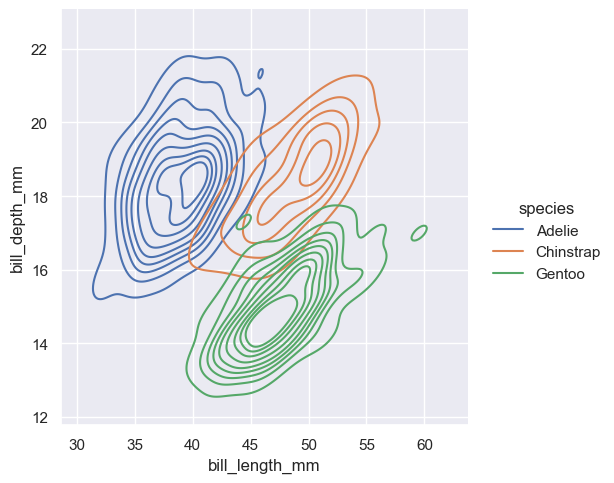

In [33]:
sns.displot(penguins, x='bill_length_mm', y='bill_depth_mm', hue='species', kind='kde');

단변량 plot과 마찬가지로, 구간크기(bin size)와 평활도(smoothing bandwidth)에 따라 이변량의 분포가 얼마나 자세하게 표현되는지가 결정됩니다. 같은 parameter를 사용하지만 여기서는 변수에 값을 pair로 전달해서 각각 다르게 지정할 수 있습니다.

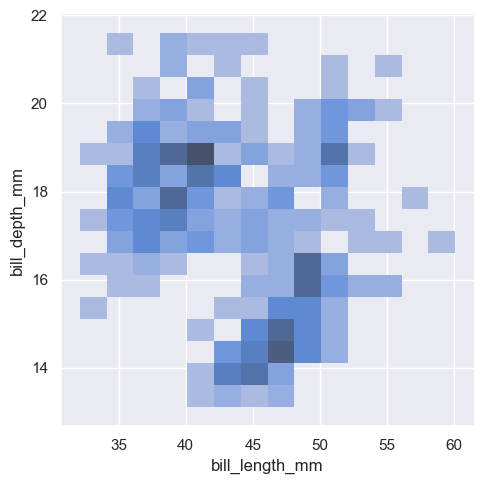

In [35]:
sns.displot(penguins, x='bill_length_mm', y='bill_depth_mm', binwidth=(2, .5));

heatmap에는 colorbar(사용된 밀도에 따른 색상을 표시)를 추가해서 해석을 도울 수도 있습니다.

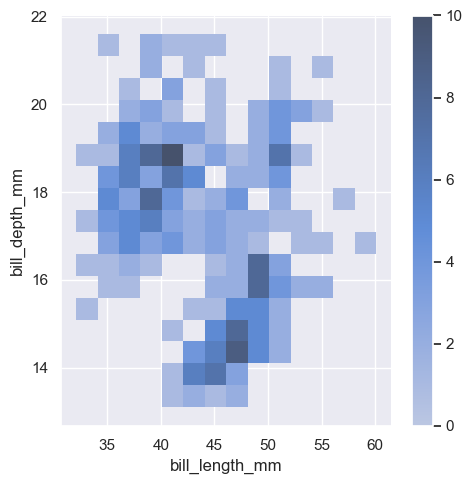

In [37]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5), 
            cbar=True);

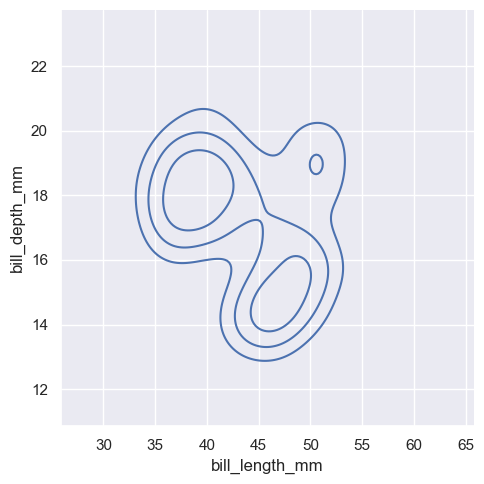

In [42]:
sns.displot(penguins, x='bill_length_mm', y='bill_depth_mm', kind='kde',
           thresh=.2, levels=4);

`levels` parameter는 list 값을 넣어서 세부적인 제어도 가능합니다 :

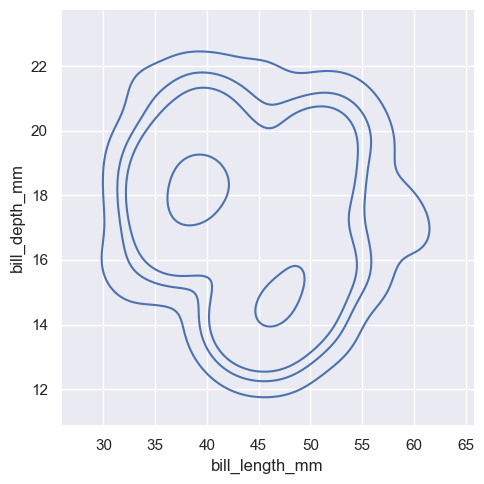

In [46]:
sns.displot(penguins, x='bill_length_mm', y='bill_depth_mm', kind='kde', 
           levels=[.01, .05, .1, .8]);

이변량 histogram에서는 불연속형 변수도 사용 가능합니다. 변수를 하나는 연속형, 다른 하나는 불연속형으로 그려보면 단변량 분포를 다른 시각으로 볼 수 있습니다 :

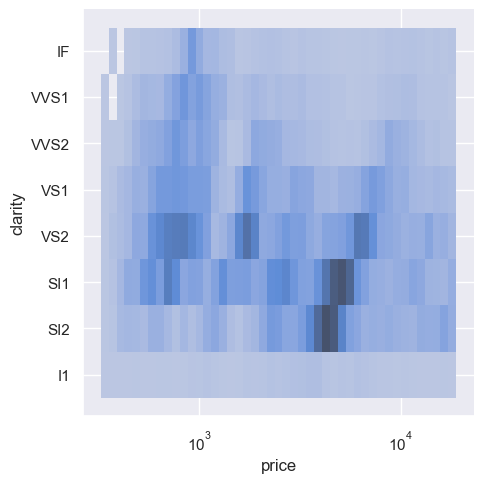

In [48]:
sns.displot(diamonds, x='price', y='clarity', log_scale=(True, False));

두 개의 변수를 모두 불연속형으로 할당한 plot은 관측값의 표(cross table)를 보기 쉽게 표현합니다.

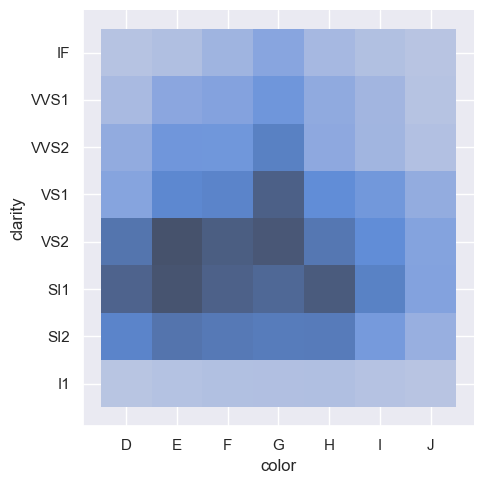

In [49]:
sns.displot(diamonds, x='color', y='clarity');

## 분포를 시각화하는 다른 방법들
Distribution visualization in other settings